# Medalla: Exploring the data behind Eth2

Before we start with data explorations, we’ll briefly cover what’s going on behind Eth2, and why it’s different from the current state of Ethereum.

In general terms, the Ethereum network is currently able to process from 15 to 30 transactions per second.

In [1]:
!python3 --version

Python 3.8.6


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Estimated transactions per second on the different networks')

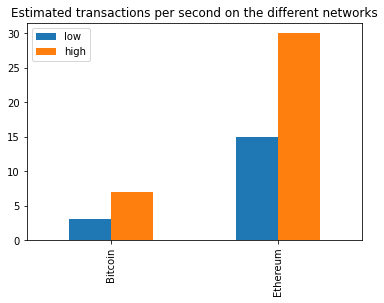

In [3]:
networks = {"Bitcoin":(3,7),
           "Ethereum":(15,45)}

df = pd.DataFrame.from_dict(networks).transpose()
df.columns = ("low", "high")

df.plot.bar()
plt.title("Estimated transactions per second on the different networks")

## We want to increase scalability (Transactions per second) of the network while not compromising decentralization. 

When compared to other centralized solutions like Visa, which can process around 10.000 transactions per second, the Ethereum falls greatly behind. This is one of the reasons for which the technology is not prepared for massive adoption, and why initiatives like Ethereum 2.0 are currently being pushed forward.

>[Vitalik Buterin] estimates that once **optimistic rollups** are fully implemented and the transition to Eth2 begins, Ethereum (ETH) will be able to process 100,000 transactions per second (Phase 1.5). In ETH2 with its sharded infrastructure, 1000-5000 TPS will be available.

It is important to note that while the deployment of Eth2's Phase 0 will not increase the Layer 1 Transactions Per Second, today there are various **rollup solutions** which would allow a [100x scaling](https://twitter.com/VitalikButerin/status/1312905882330521600) of the current network.

In [28]:
networks["Ethereum w/ rollups"] = (1500, 3000)
networks["Eth2 (Phase 1.5)"] = (1000, 5000) 
networks["Eth2 (Phase 1.5) w/ rollups"] = (25000, 100000) 
networks["EOS"] = (4000,9000)
networks["Visa"] = (9000,11000)

,low,high
Bitcoin,3,7
Ethereum,15,30
Eth2 (Phase 1.5),1000,5000
Ethereum w/ rollups,1500,3000
EOS,4000,9000
Visa,9000,11000
Eth2 (Phase 1.5) w/ rollups,25000,100000


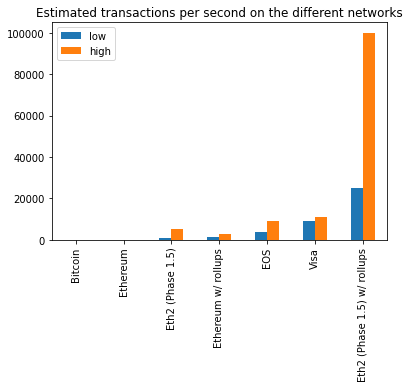

In [29]:
df = pd.DataFrame.from_dict(networks).transpose()
df.columns = ("low", "high")
df = df.sort_values(by=["low"])
df.plot.bar()
plt.title("Estimated transactions per second on the different networks")
df

Text(0.5, 1.0, 'Estimated transactions per second with the development of Eth2')

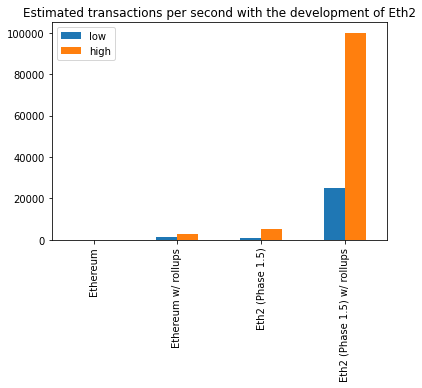

In [34]:
Eth_comparison = df.transpose()[["Ethereum", "Ethereum w/ rollups", "Eth2 (Phase 1.5)", "Eth2 (Phase 1.5) w/ rollups"]].transpose()
Eth_comparison.plot.bar()
plt.title("Estimated transactions per second with the development of Eth2")

### With this clear goal of increasing the Transactions Per Second, and roadmap in mind, let's dive deeper into the concepts which will allow the initial Eth2 increase

- **The Beacon chain**: This is the initial step towards scaling ethereum's "layer 1". On the Eth2 roadmap, the deployment of the Beacon Chain will be done on the Phase 0.

- **The sidechains**: These are connected with the beacon chain

- **Slots**

- **Epochs**

- **Validators**: Individuals who participate by proposing and attesting for blocks. 

 - **Penalties**:

 - **Slashing**:

In [43]:
print('ready for some more eth data?')

ready for some more eth data?


In [10]:
data = 'data/09_16_20/attestations_1.csv' 

In [11]:
df = pd.read_csv(data)

In [42]:
print(f"{df.size=}")
print(f"{df.shape=}")
print(f"{df.columns=}")
df.describe()

df.size=14
df.shape=(7, 2)
df.columns=Index(['low', 'high'], dtype='object')


,low,high
count,7.000000,7.000000
mean,5788.285714,18291.000000
std,9043.602466,36272.294712
min,3.000000,7.000000
25%,507.500000,1515.000000
50%,1500.000000,5000.000000
75%,6500.000000,10000.000000
max,25000.000000,100000.000000


In [16]:
df.head()

,slot,beacon_block_root,attesting_indices,source_epoch,source_block_root,target_epoch,target_block_root
0,64590,0x2622bb6825cbd8041bfb719ecc8cec31a8e39881a472...,0000000000000000000000000001000000001000000000...,2017,0xd0fe548ffd8197f58814300ed02471ae8d386e0fc24e...,2018,0xabcbd38d70fd0123c136a4593d820bdef1fc94251a44...
1,64590,0x3de5c03066e9c33694f5af05d8c2150fc634ed96bffe...,1011100101101011001111010110111101001111111111...,2017,0xd0fe548ffd8197f58814300ed02471ae8d386e0fc24e...,2018,0xabcbd38d70fd0123c136a4593d820bdef1fc94251a44...
2,64590,0x3de5c03066e9c33694f5af05d8c2150fc634ed96bffe...,0011110100111110101011011110100111001011000111...,2017,0xd0fe548ffd8197f58814300ed02471ae8d386e0fc24e...,2018,0xabcbd38d70fd0123c136a4593d820bdef1fc94251a44...
3,64590,0x2622bb6825cbd8041bfb719ecc8cec31a8e39881a472...,0000000000000000000000000000000000000000000000...,2017,0xd0fe548ffd8197f58814300ed02471ae8d386e0fc24e...,2018,0xabcbd38d70fd0123c136a4593d820bdef1fc94251a44...
4,64590,0x2622bb6825cbd8041bfb719ecc8cec31a8e39881a472...,0000000000000000000000000000001000000000000000...,2017,0xd0fe548ffd8197f58814300ed02471ae8d386e0fc24e...,2018,0xabcbd38d70fd0123c136a4593d820bdef1fc94251a44...


In [17]:
df.tail()

,slot,beacon_block_root,attesting_indices,source_epoch,source_block_root,target_epoch,target_block_root
50848,37964,0xaec224ceeb5b762110803d91b8c28d96f000341c75b6...,0000000000000000000000000000000000000000000000...,1184,0x7a3ec53ae4dd06b003cdf7281e11f88be6b64e64ea05...,1185,0x48397603666de6bb3cf216832668006970c9fd5856ae...
50849,37964,0xaec224ceeb5b762110803d91b8c28d96f000341c75b6...,0000000000000000000000000000000000000000000000...,1184,0x7a3ec53ae4dd06b003cdf7281e11f88be6b64e64ea05...,1185,0x48397603666de6bb3cf216832668006970c9fd5856ae...
50850,37964,0xe5bc232783b46ac9fe01bc15895f6b32d1901095510b...,0000000000000000000000000000000000000000000000...,1185,0x48397603666de6bb3cf216832668006970c9fd5856ae...,1186,0xc293b248d7f0de88f85c8693eb9537dd271e71b0b530...
50851,37964,0x78962523169aa1448ebc81b82fb1f01eca73cb7f8316...,0000000000000000000000000000000000000000000000...,1185,0x48397603666de6bb3cf216832668006970c9fd5856ae...,1186,0xc293b248d7f0de88f85c8693eb9537dd271e71b0b530...
50852,37964,0x01454d5b36faafbb9b1ba3211fb6db33d6a5194f556a...,0000000000000000000000000000000000000000000100...,1184,0x7a3ec53ae4dd06b003cdf7281e11f88be6b64e64ea05...,1185,0x48397603666de6bb3cf216832668006970c9fd5856ae...


In [18]:
df.slot.unique().size

998